In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import math

In [148]:
data = pd.read_excel("EvaluasiTingkatStress.xlsx")
df = pd.DataFrame(data.loc[:, ['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari', 'Kesibukan Perhari', 'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty','Score', 'Tingkat Stress']])
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Tingkat Stress
0,19,Perempuan,Mahasiswa,Tidak,1,8,4,3,5,4,3,5,5,5,34,High Perceived Stress
1,20,Laki-laki,Mahasiswa,Ya,3,15,5,5,5,2,3,2,5,2,29,High Perceived Stress
2,22,Perempuan,Mahasiswa,Tidak,3,8,5,5,5,4,4,5,5,5,38,High Perceived Stress
3,18,Perempuan,Mahasiswa,Ya,3,10,4,3,5,4,4,4,5,4,33,High Perceived Stress
4,18,Perempuan,Mahasiswa,Tidak,3,4,3,5,5,4,5,5,5,5,37,High Perceived Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,18,Perempuan,Mahasiswa,Tidak,8,8,1,3,3,3,3,3,4,2,22,Stress Moderated
152,24,Perempuan,Mahasiswa,Tidak,8,4,3,2,4,2,3,2,3,3,22,Stress Moderated
153,24,Perempuan,Mahasiswa,Tidak,8,15,5,4,3,2,4,4,2,5,29,High Perceived Stress
154,15,Laki-laki,Pelajar,Tidak,10,5,3,5,4,4,4,3,4,4,31,High Perceived Stress


In [149]:
# Mendeteksi missing value pada variabel
if df.isnull().values.any():
    print("\n---Berikut nilai-nilai yang hilang pada data:---")
    print("")
    print(df[df.isnull().any(axis=1)])
else:
    print("\n---Tidak terdapat missing value pada data---")

# Mengganti missing value dengan mean
if df.isnull().values.any():
    df = df.fillna(df.mean())
    print("\n---Berikut hasil missing value pada data yang sudah diperbaiki:---")
    print("")
    print(df)
else:
    print("")



---Tidak terdapat missing value pada data---



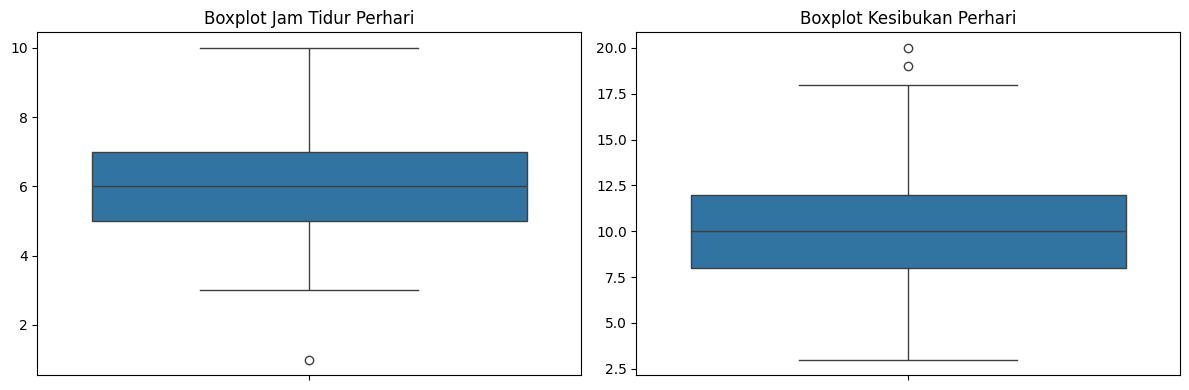

Outliers for Jam Tidur Perhari:
[1]
Outliers for Kesibukan Perhari:
[20 19]


In [150]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Jam Tidur Perhari', 'Kesibukan Perhari']

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

outliers_data = {}  # Dictionary untuk menyimpan nilai outlier

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

    # Menghitung nilai outlier
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    outliers = df[(df[var] > upper_bound) | (df[var] < lower_bound)][var]
    
    # Menyimpan nilai outlier ke dalam dictionary
    outliers_data[var] = outliers

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

# Mencetak nilai outlier
for var, outliers in outliers_data.items():
    print(f'Outliers for {var}:')
    print(outliers.values)  # Mencetak nilai outlier dari dictionary

Handling outliers for Jam Tidur Perhari with mean value.
[1]
Handling outliers for Kesibukan Perhari with mean value.
[20 19]


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46380\2356428290.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.846153846153846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46380\2356428290.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.307692307692308' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value


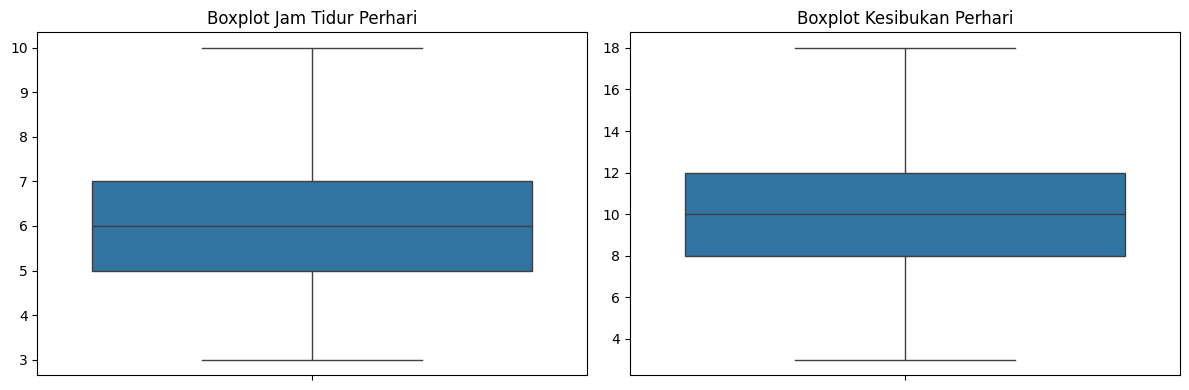

In [151]:
# Mengganti outlier dengan nilai mean
for var, outliers in outliers_data.items():
    if not outliers.empty:
        # Hitung nilai mean variabel
        mean_value = df[var].mean()
        
        # Ganti outlier dengan nilai mean
        df.loc[df[var].isin(outliers), var] = mean_value

# Sekarang, outlier telah diganti dengan nilai mean. Anda dapat mengeceknya dengan kode berikut:
for var, outliers in outliers_data.items():
    if not outliers.empty:
        print(f'Handling outliers for {var} with mean value.')
        print(outliers.values)  # Mencetak nilai outlier yang telah diganti dengan nilai mean

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

In [152]:
df.describe(include= 'all')

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Tingkat Stress
count,156.000000,156,156,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156
unique,NaN,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Perempuan,Mahasiswa,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Perceived Stress
freq,NaN,101,144,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93
mean,19.826923,NaN,NaN,NaN,5.877219,10.189842,3.730769,3.615385,3.846154,2.782051,3.217949,3.442308,3.455128,3.666667,27.756410,NaN
std,2.134701,NaN,NaN,NaN,1.230452,3.108331,0.939088,0.986761,0.951426,0.959132,0.945583,0.952012,1.097463,1.114904,4.737458,NaN
min,14.000000,NaN,NaN,NaN,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,NaN
25%,19.000000,NaN,NaN,NaN,5.000000,8.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,24.000000,NaN
50%,20.000000,NaN,NaN,NaN,6.000000,10.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.500000,4.000000,28.000000,NaN
75%,20.000000,NaN,NaN,NaN,7.000000,12.000000,4.000000,4.000000,5.000000,3.250000,4.000000,4.000000,4.000000,5.000000,31.000000,NaN


In [153]:
df['Jenis Kelamin'].replace({'Laki-laki':0, 'Perempuan':1}, inplace=True)
df['Status'].replace({'Pelajar':0,'Mahasiswa':1,'Lainnya':2}, inplace=True)
df['Bekerja'].replace({'Tidak':0,'Ya':1}, inplace=True)
df['Tingkat Stress'].replace({'Low Stress':1, 'Stress Moderated':2, 'High Perceived Stress':3,}, inplace=True)
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Tingkat Stress
0,19,1,1,0,5.846154,8.0,4,3,5,4,3,5,5,5,34,3
1,20,0,1,1,3.000000,15.0,5,5,5,2,3,2,5,2,29,3
2,22,1,1,0,3.000000,8.0,5,5,5,4,4,5,5,5,38,3
3,18,1,1,1,3.000000,10.0,4,3,5,4,4,4,5,4,33,3
4,18,1,1,0,3.000000,4.0,3,5,5,4,5,5,5,5,37,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,18,1,1,0,8.000000,8.0,1,3,3,3,3,3,4,2,22,2
152,24,1,1,0,8.000000,4.0,3,2,4,2,3,2,3,3,22,2
153,24,1,1,0,8.000000,15.0,5,4,3,2,4,4,2,5,29,3
154,15,0,0,0,10.000000,5.0,3,5,4,4,4,3,4,4,31,3


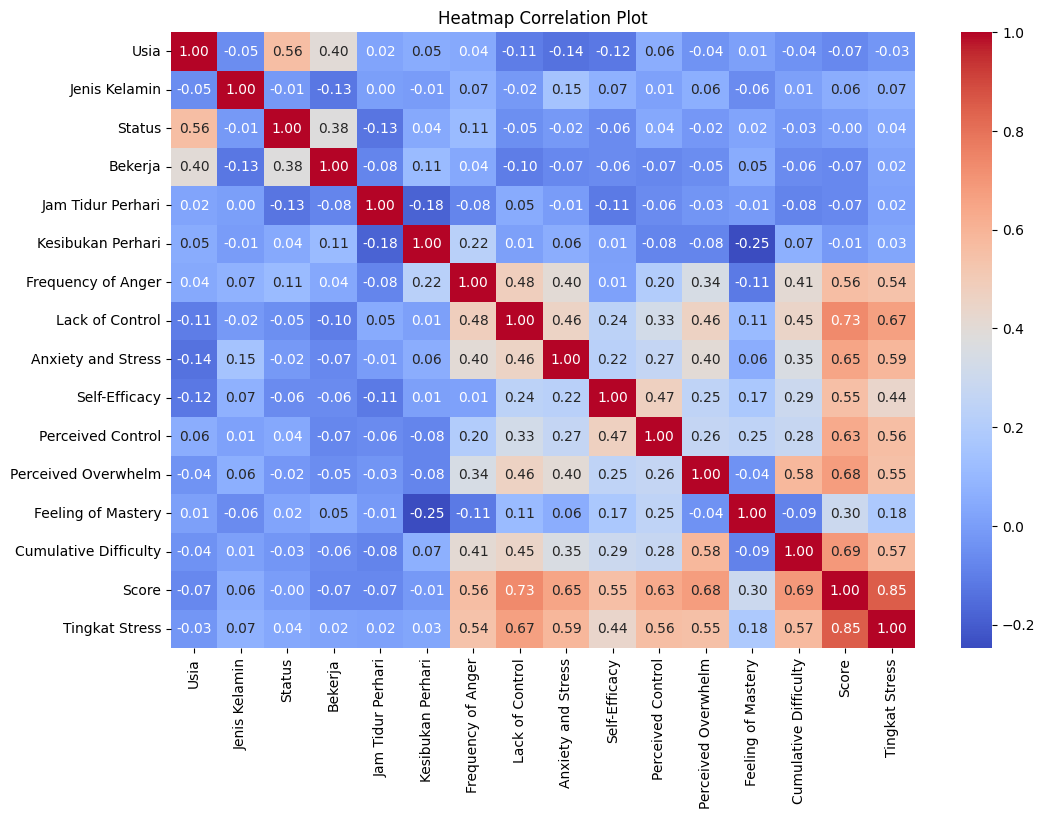

In [154]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat Heatmap Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Plot')
plt.show()

In [155]:
y = df["Tingkat Stress"]
X = df.drop(["Usia","Jenis Kelamin","Status","Bekerja","Jam Tidur Perhari","Feeling of Mastery","Score","Tingkat Stress",], axis = 1)

In [156]:
df['Tingkat Stress'].replace({1:'Low Stress', 2:'Stress Moderated', 3:'High Perceived Stress'}, inplace=True)

In [157]:
y.head()

0    High Perceived Stress
1    High Perceived Stress
2    High Perceived Stress
3    High Perceived Stress
4    High Perceived Stress
Name: Tingkat Stress, dtype: object

In [158]:
X.head()

,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Cumulative Difficulty
0,8.0,4,3,5,4,3,5,5
1,15.0,5,5,5,2,3,2,2
2,8.0,5,5,5,4,4,5,5
3,10.0,4,3,5,4,4,4,4
4,4.0,3,5,5,4,5,5,5


In [159]:
# Split into test and training sets
test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [160]:
X_train.head()

,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Cumulative Difficulty
56,8.0,5,4,5,3,3,4,5
138,9.0,5,4,4,3,4,4,4
123,8.0,3,3,4,3,3,3,4
128,7.0,4,4,3,3,3,4,5
127,12.0,3,4,4,3,3,5,5


In [161]:
X_test.head()

,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Cumulative Difficulty
96,18.0,4,4,4,3,3,3,4
69,10.0,5,5,5,3,3,3,5
82,12.0,4,5,4,1,3,4,4
76,10.0,4,3,4,2,2,3,3
114,8.0,2,4,5,3,2,2,2


In [162]:
y_train.head()

56     High Perceived Stress
138    High Perceived Stress
123    High Perceived Stress
128    High Perceived Stress
127    High Perceived Stress
Name: Tingkat Stress, dtype: object

In [163]:
y_test.head()

96     High Perceived Stress
69     High Perceived Stress
82     High Perceived Stress
76          Stress Moderated
114         Stress Moderated
Name: Tingkat Stress, dtype: object

In [164]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
predictions_test_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_test_dt)
precision_dt = precision_score(y_test, predictions_test_dt, average='weighted', zero_division=1)
recall_dt = recall_score(y_test, predictions_test_dt, average='weighted')
f1_dt = f1_score(y_test, predictions_test_dt, average='weighted')
print("\n====== Decision Tree ======")
print(f"Precision (Decision Tree): {precision_dt}")
print(f"Recall (Decision Tree): {recall_dt}")
print(f"F1 Score (Decision Tree): {f1_dt}")
print(f"Test Accuracy (Decision Tree): {accuracy_dt}")

# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions_test_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_test_rf)
precision_rf = precision_score(y_test, predictions_test_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, predictions_test_rf, average='weighted')
f1_rf = f1_score(y_test, predictions_test_rf, average='weighted')
print("\n====== Random Forest ======")
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1 Score (Random Forest): {f1_rf}")
print(f"Test Accuracy (Random Forest): {accuracy_rf}")


# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
predictions_test_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_test_knn)
precision_knn = precision_score(y_test, predictions_test_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_test, predictions_test_knn, average='weighted')
f1_knn = f1_score(y_test, predictions_test_knn, average='weighted')
print("\n====== K-Nearest Neighbors ======")
print(f"Precision (K-Nearest Neighbors): {precision_knn}")
print(f"Recall (K-Nearest Neighbors): {recall_knn}")
print(f"F1 Score (K-Nearest Neighbors): {f1_knn}")
print(f"Test Accuracy (K-Nearest Neighbors): {accuracy_knn}")

# Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_test_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_test_svm)
precision_svm = precision_score(y_test, predictions_test_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, predictions_test_svm, average='weighted')
f1_svm = f1_score(y_test, predictions_test_svm, average='weighted')
print("\n====== Support Vector Machine ======")
print(f"Precision (Support Vector Machine): {precision_svm}")
print(f"Recall (Support Vector Machine): {recall_svm}")
print(f"F1 Score (Support Vector Machine): {f1_svm}")
print(f"Test Accuracy (Support Vector Machine): {accuracy_svm}")

# Logistic Regression
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)
predictions_test_logreg = model_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, predictions_test_logreg)
precision_logreg = precision_score(y_test, predictions_test_logreg, average='weighted', zero_division=1)
recall_logreg = recall_score(y_test, predictions_test_logreg, average='weighted')
f1_logreg = f1_score(y_test, predictions_test_logreg, average='weighted')
print("\n====== Logistic Regression ======")
print(f"Precision (Logistic Regression): {precision_logreg}")
print(f"Recall (Logistic Regression): {recall_logreg}")
print(f"F1 Score (Logistic Regression): {f1_logreg}")
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg}")

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_test_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, predictions_test_nb)
precision_nb = precision_score(y_test, predictions_test_nb, average='weighted', zero_division=1)
recall_nb = recall_score(y_test, predictions_test_nb, average='weighted')
f1_nb = f1_score(y_test, predictions_test_nb, average='weighted')
print("\n====== Naive Bayes ======")
print(f"Precision (Naive Bayes): {precision_nb}")
print(f"Recall (Naive Bayes): {recall_nb}")
print(f"F1 Score (Naive Bayes): {f1_nb}")
print(f"Test Accuracy (Naive Bayes): {accuracy_nb}")

# Find and print the model with the highest accuracy
model_metrics = {
    "Decision Tree": {"Accuracy": accuracy_dt, "Precision": precision_dt, "Recall": recall_dt, "F1": f1_dt},
    "Random Forest": {"Accuracy": accuracy_rf, "Precision": precision_rf, "Recall": recall_rf, "F1": f1_rf},
    "K-Nearest Neighbors": {"Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1": f1_knn},
    "Support Vector Machine": {"Accuracy": accuracy_svm, "Precision": precision_svm, "Recall": recall_svm, "F1": f1_svm},
    "Logistic Regression": {"Accuracy": accuracy_logreg, "Precision": precision_logreg, "Recall": recall_logreg, "F1": f1_logreg},
    "Naive Bayes": {"Accuracy": accuracy_nb, "Precision": precision_nb, "Recall": recall_nb, "F1": f1_nb},
}

best_model = max(model_metrics, key=lambda k: model_metrics[k]["Accuracy"])
print(f"\nThe model with the highest accuracy is: {best_model} with accuracy {model_metrics[best_model]['Accuracy']}")


====== Decision Tree ======
Precision (Decision Tree): 0.8821428571428571
Recall (Decision Tree): 0.875
F1 Score (Decision Tree): 0.8677156177156176
Test Accuracy (Decision Tree): 0.875

====== Random Forest ======
Precision (Random Forest): 0.9127024291497975
Recall (Random Forest): 0.90625
F1 Score (Random Forest): 0.8772972972972973
Test Accuracy (Random Forest): 0.90625

====== K-Nearest Neighbors ======
Precision (K-Nearest Neighbors): 0.8227272727272728
Recall (K-Nearest Neighbors): 0.8125
F1 Score (K-Nearest Neighbors): 0.7789772727272727
Test Accuracy (K-Nearest Neighbors): 0.8125

====== Support Vector Machine ======
Precision (Support Vector Machine): 0.9127024291497975
Recall (Support Vector Machine): 0.90625
F1 Score (Support Vector Machine): 0.8772972972972973
Test Accuracy (Support Vector Machine): 0.90625

====== Logistic Regression ======
Precision (Logistic Regression): 0.9127024291497975
Recall (Logistic Regression): 0.90625
F1 Score (Logistic Regression): 0.87729729

In [166]:
from sklearn.metrics import classification_report, confusion_matrix
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
predictions_test_dt = model_dt.predict(X_test)
print(confusion_matrix(y_test, predictions_test_dt))
print(classification_report(y_test, predictions_test_dt)) 

# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions_test_rf = model_rf.predict(X_test)
print(confusion_matrix(y_test, predictions_test_rf))
print(classification_report(y_test, predictions_test_rf)) 


# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
predictions_test_knn = model_knn.predict(X_test)
print(confusion_matrix(y_test, predictions_test_knn))
print(classification_report(y_test, predictions_test_knn)) 

# Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_test_svm = model_svm.predict(X_test)
print(confusion_matrix(y_test, predictions_test_svm))
print(classification_report(y_test, predictions_test_svm)) 

# Logistic Regression
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)
predictions_test_logreg = model_logreg.predict(X_test)
print(confusion_matrix(y_test, predictions_test_logreg))
print(classification_report(y_test, predictions_test_logreg)) 

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_test_nb = model_nb.predict(X_test)
print(confusion_matrix(y_test, predictions_test_nb))
print(classification_report(y_test, predictions_test_nb)) 

# # Find and print the model with the highest accuracy
# model_metrics = {
#     "Decision Tree": {"Accuracy": accuracy_dt, "Precision": precision_dt, "Recall": recall_dt, "F1": f1_dt},
#     "Random Forest": {"Accuracy": accuracy_rf, "Precision": precision_rf, "Recall": recall_rf, "F1": f1_rf},
#     "K-Nearest Neighbors": {"Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1": f1_knn},
#     "Support Vector Machine": {"Accuracy": accuracy_svm, "Precision": precision_svm, "Recall": recall_svm, "F1": f1_svm},
#     "Logistic Regression": {"Accuracy": accuracy_logreg, "Precision": precision_logreg, "Recall": recall_logreg, "F1": f1_logreg},
#     "Naive Bayes": {"Accuracy": accuracy_nb, "Precision": precision_nb, "Recall": recall_nb, "F1": f1_nb},
# }

# best_model = max(model_metrics, key=lambda k: model_metrics[k]["Accuracy"])
# print(f"\nThe model with the highest accuracy is: {best_model} with accuracy {model_metrics[best_model]['Accuracy']}")

[[18  0  0]
 [ 0  1  1]
 [ 3  1  8]]
                       precision    recall  f1-score   support

High Perceived Stress       0.86      1.00      0.92        18
           Low Stress       0.50      0.50      0.50         2
     Stress Moderated       0.89      0.67      0.76        12

             accuracy                           0.84        32
            macro avg       0.75      0.72      0.73        32
         weighted avg       0.85      0.84      0.84        32

[[18  0  0]
 [ 0  0  2]
 [ 1  0 11]]
                       precision    recall  f1-score   support

High Perceived Stress       0.95      1.00      0.97        18
           Low Stress       0.00      0.00      0.00         2
     Stress Moderated       0.85      0.92      0.88        12

             accuracy                           0.91        32
            macro avg       0.60      0.64      0.62        32
         weighted avg       0.85      0.91      0.88        32

[[18  0  0]
 [ 0  0  2]
 [ 4  0  8]]
 

c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_